## Testing and Performance Analysis

[Back to Main](../Project.ipynb)


Having trained our models, the next step is to evaluate their performance on unseen data. This will give us an objective measure of how well our models are likely to perform in real-world scenarios.


## Import dependencies

In [1]:
# Importing necessary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the enhanced (before training) models
cifar_model_old = load_model('../saved_models/cifar_model_enhanced.h5')
fmnist_model_old = load_model('../saved_models/fmnist_model_enhanced.h5')

# Load the trained models
cifar_model = load_model('../saved_models/cifar_model_trained.keras')
fmnist_model = load_model('../saved_models/fmnist_model_trained.keras')

data = np.load('../saved_models/cifar_data.npz')
train_images_cifar = data['train_images']
test_images_cifar = data['test_images']
train_labels_cifar = data['train_labels']
test_labels_cifar = data['test_labels']


data = np.load('../saved_models/fmnist_data.npz')
train_images_fmnist = data['train_images']
test_images_fmnist = data['test_images']
train_labels_fmnist = data['train_labels']
test_labels_fmnist = data['test_labels']

### ``CIFAR-10 Model Evaluation``

Before diving into the visualization, it's important to evaluate the performance of our model. This will give us a tangible metric to understand how well the model is predicting against the test set. Two key metrics that we will look at are:

1. **``Accuracy``** - This represents the percentage of images that were classified correctly by the model.
2. **``Loss (Categorical Crossentropy)``** - This represents how well the predicted probabilities align with the true labels. A lower loss indicates better performance.


In [2]:
# Evaluating the CIFAR-10 model
test_loss_cifar, test_acc_cifar = cifar_model.evaluate(test_images_cifar, test_labels_cifar, verbose=2)
print(f"\nTest accuracy for CIFAR-10 model: {test_acc_cifar*100:.2f}%")
print(f"Test loss for CIFAR-10 model: {test_loss_cifar:.4f}")

print("\n")

test_loss_cifar_old, test_acc_cifar_old = cifar_model_old.evaluate(test_images_cifar, test_labels_cifar, verbose=2)
print(f"\nTest accuracy for CIFAR-10 before training model: {test_acc_cifar*100:.2f}%")
print(f"Test loss for CIFAR-10 before training model: {test_loss_cifar:.4f}")


313/313 - 3s - loss: 0.9380 - accuracy: 0.6762 - 3s/epoch - 11ms/step

Test accuracy for CIFAR-10 model: 67.62%
Test loss for CIFAR-10 model: 0.9380


313/313 - 3s - loss: 2.3094 - accuracy: 0.0923 - 3s/epoch - 11ms/step

Test accuracy for CIFAR-10 before training model: 67.62%
Test loss for CIFAR-10 before training model: 0.9380


**``Before Training:``**

Upon initial inspection (before training), the CIFAR-10 model had an accuracy of approximately 9.23%. This is expected as the model hasn't been trained yet, so its predictions are essentially random. The loss was relatively high at about 2.3094, which again is expected for an untrained model.

**``After Training:``**

After the training phase, the model's performance improved drastically. The accuracy shot up to 67.62%, and the loss decreased to 0.9380. This showcases the power and importance of training a neural network with relevant data.

### ``Visual Representation of Model's Performance``

While numbers can provide a clear picture of the model's performance, visualizing these metrics can offer an even clearer understanding. In the following bar chart:

- The red bars represent the accuracy of the model, before and after training.
- The blue bars represent the loss of the model, before and after training.

By comparing these bars side-by-side for each phase (before and after training), we can easily observe the improvements made during the training process.

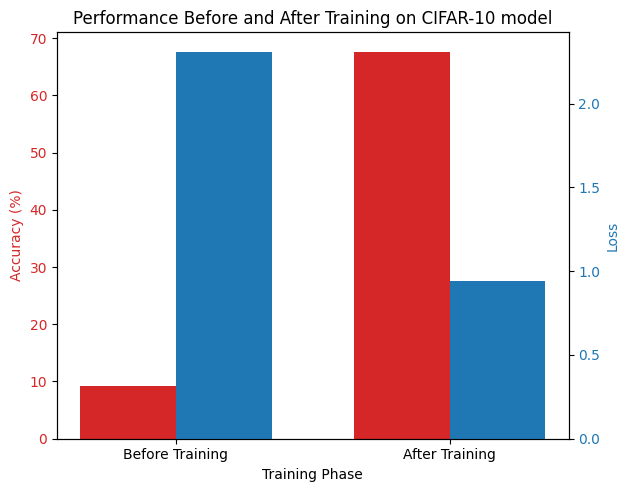

In [3]:
# Now, let's visualize
labels = ['Before Training', 'After Training']
accuracy_values = [test_acc_cifar_old*100, test_acc_cifar*100]
loss_values = [test_loss_cifar_old, test_loss_cifar]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Training Phase')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(x, accuracy_values, width, label='Accuracy', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x + width / 2)  # Updated this line to shift the tick positions
ax1.set_xticklabels(labels)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.bar(x + width, loss_values, width, label='Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Performance Before and After Training on CIFAR-10 model')
plt.show()


### ``Observations on Model Performance``

From the visual representation, it's evident that the training process has had a profound impact on the performance of our CIFAR-10 model.

**``Accuracy:``** 
Before training, the model's accuracy was notably low, indicating that its predictions were almost random. After the training phase, there was a significant increase in accuracy, showcasing that the model has learned patterns from the training data and can now predict classes with a higher degree of certainty.

**``Loss:``** 
On the loss front, we observed a substantial decrease after training. The high loss before training was a clear indicator of the model's initial inability to make confident predictions. The reduction in loss post-training signifies that the model's predictions are now better aligned with the true labels.

In essence, these observations underscore the importance of a well-structured training process. It's fascinating to see how a model can evolve from making random guesses to reasonably accurate predictions by learning from data.

---

### ``Evaluating the Fashion MNIST Model``

Similarly, we'll evaluate the performance of the Fashion MNIST model using its respective test dataset.

The approach taken for evaluating Fashion MNIST Model is identical to the one used for the CIFAR-10 model. We'll first evaluate the performance of the model before and after training and then visualize the results to get a clear understanding of the improvements.


In [4]:
# Evaluating the Fashion MNIST model
test_loss_fmnist, test_acc_fmnist = fmnist_model.evaluate(test_images_fmnist, test_labels_fmnist, verbose=2)
print(f"\nTest accuracy for Fashion MNIST model: {test_acc_fmnist*100:.2f}%")
print(f"Test loss for Fashion MNIST model: {test_loss_fmnist:.4f}")

print("\n")

test_loss_fmnist_old, test_acc_fmnist_old = fmnist_model_old.evaluate(test_images_fmnist, test_labels_fmnist, verbose=2)
print(f"\nTest accuracy for Fashion MNIST model: {test_acc_fmnist_old*100:.2f}%")
print(f"Test loss for Fashion MNIST model: {test_loss_fmnist_old:.4f}")


313/313 - 2s - loss: 0.2845 - accuracy: 0.8967 - 2s/epoch - 5ms/step

Test accuracy for Fashion MNIST model: 89.67%
Test loss for Fashion MNIST model: 0.2845


313/313 - 2s - loss: 2.3047 - accuracy: 0.0667 - 2s/epoch - 5ms/step

Test accuracy for Fashion MNIST model: 6.67%
Test loss for Fashion MNIST model: 2.3047


**``Visualizing the Results``**

Just like with the CIFAR-10 model, visualizing the performance metrics can give us a clearer understanding of how the model has improved after training.

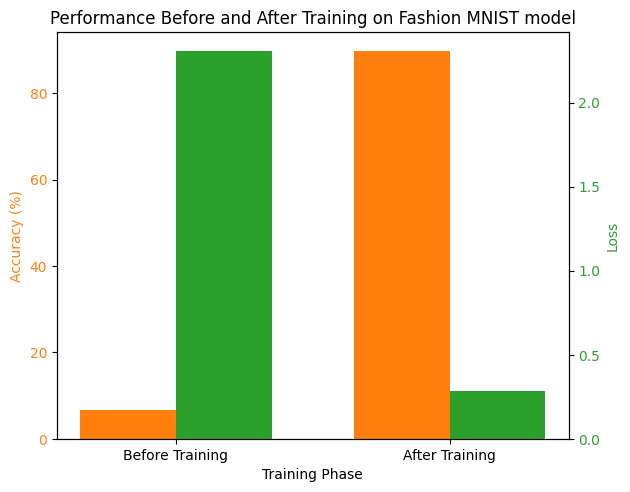

In [5]:
# Now, let's visualize
labels = ['Before Training', 'After Training']
accuracy_values = [test_acc_fmnist_old*100, test_acc_fmnist*100]
loss_values = [test_loss_fmnist_old, test_loss_fmnist]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Training Phase')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(x, accuracy_values, width, label='Accuracy', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x + width / 2)  # Updated this line to shift the tick positions
ax1.set_xticklabels(labels)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.bar(x + width, loss_values, width, label='Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Performance Before and After Training on Fashion MNIST model')
plt.show()


**``Observations:``**

- There's a significant improvement in accuracy after the model is trained. This shows the model has learned features from the training data effectively.
- The loss reduces substantially after training, indicating that the model is making fewer mistakes and is more confident in its predictions.
- The gap between training and validation accuracy is also an indicator of how well the model is generalizing. A smaller gap indicates better generalization.

---

## ``Confusion Matrices``

Confusion matrices are powerful tools that allow us to visualize the performance of classification models. Each row of the matrix represents the instances of an actual class, while each column represents the instances of a predicted class. This provides a detailed breakdown of where the model's predictions were correct and where they went wrong. 

In essence, the diagonal elements of the matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.

Confusion Matrix for CIFAR-10 Model

313/313 [==============================] - 4s 12ms/step


<Figure size 1000x800 with 0 Axes>

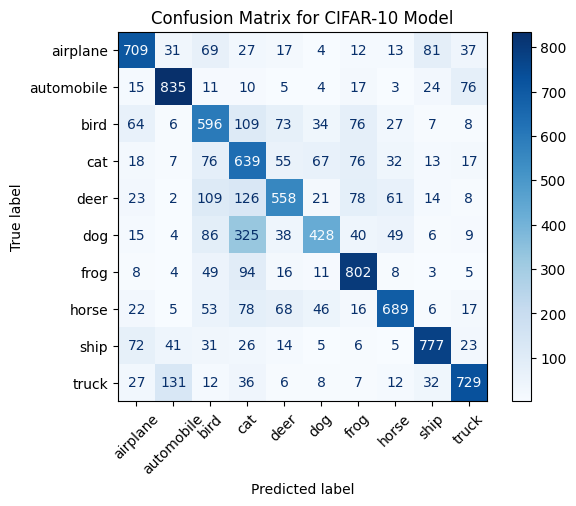

In [13]:
# Predicting classes for CIFAR-10 test dataset
predictions_cifar = cifar_model.predict(test_images_cifar)
predicted_labels_cifar = np.argmax(predictions_cifar, axis=1)
true_labels_cifar = np.argmax(test_labels_cifar, axis=1)

# Generating the confusion matrix for CIFAR-10
cm_cifar = confusion_matrix(true_labels_cifar, predicted_labels_cifar)

# Visualizing some images from CIFAR-10
class_names_cifar = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm_cifar, display_labels=class_names_cifar).plot(values_format='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CIFAR-10 Model')
plt.xticks(rotation=45)
plt.show()


**``Observations for the CIFAR-10 Model:``**

- The model seems to perform relatively well for classes like 'airplane', 'automobile', and 'truck' (as indicated by the high values on the diagonal for these classes).
- Some confusion can be observed between classes that might have visual similarities, such as 'cat' and 'dog', or 'bird' and 'frog'.
- Misclassifications, as indicated by higher values outside the diagonal, provide insights into which classes the model finds challenging to distinguish.

Confusion Matrix for Fashion MNIST Model

313/313 [==============================] - 2s 6ms/step


<Figure size 1000x800 with 0 Axes>

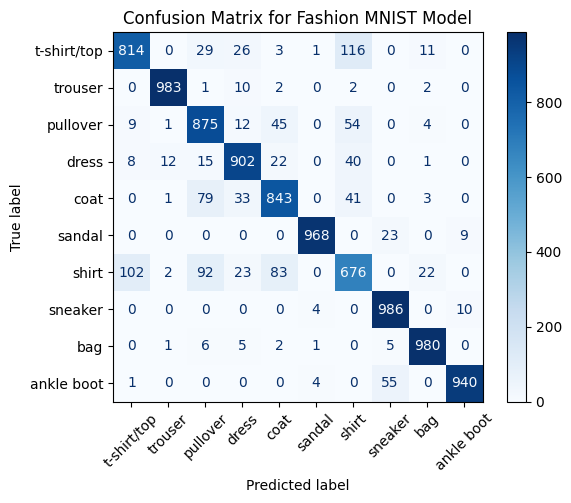

In [12]:
# Predicting classes for Fashion MNIST test dataset
predictions_fmnist = fmnist_model.predict(test_images_fmnist)
predicted_labels_fmnist = np.argmax(predictions_fmnist, axis=1)
true_labels_fmnist = np.argmax(test_labels_fmnist, axis=1)

# Generating the confusion matrix for Fashion MNIST
cm_fmnist = confusion_matrix(true_labels_fmnist, predicted_labels_fmnist)

# Visualization of sample images from Fashion MNIST
class_names_fmnist = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Visualizing the confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm_fmnist, display_labels=class_names_fmnist).plot(values_format='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST Model')
plt.xticks(rotation=45)
plt.show()


**``Observations for the Fashion MNIST Model:``**

- The model shows strong performance on classes like 'trouser', 'sandal', and 'sneaker'. This is evident from the high values on the diagonal for these labels.
- The classes 'shirt' and 't-shirt/top' seem to have a level of confusion, which is understandable given their visual similarities.
- Overall, the diagonal dominance in the matrix indicates that the model has achieved a good classification accuracy across most classes.

**``Conclusions:``**

Confusion matrices provide a detailed view of the model's performance, highlighting not just where it's succeeding, but also where it's struggling. By analyzing these matrices, we can pinpoint which classes may require additional attention or data augmentation, and potentially refine our model or preprocessing techniques accordingly.

---

## ``General Conclusion on the Tests``

Throughout this evaluation, we subjected two models trained on different datasets (``CIFAR-10`` and ``Fashion MNIST``) to various tests to gauge their performance.

1. **``Model Performance Metrics``**: We began by examining two vital metrics — accuracy and loss. Accuracy gave us an understanding of how many predictions the model got right, while the loss provided insights into how confidently the model made these predictions. Both models demonstrated significant improvement after the training phase, reinforcing the importance of a well-structured training regimen.

2. **``Visualizing Performance``**: Visual aids like bar graphs provided a comparative look at model performance before and after training. The difference in the bars was a stark visual reminder of the transformative power of training.

3. **``Delving Deeper with Confusion Matrices``**: While accuracy and loss gave an overview, the confusion matrices provided a more granular perspective. They highlighted not only the areas where the model performed well but also instances where it faltered. 

For the **``CIFAR-10 model``**, it was evident that the model could distinguish between distinct objects like 'airplane' and 'truck' quite well. However, it faced challenges when the objects had visual similarities, such as 'cats' and 'dogs'.

On the other hand, the **``Fashion MNIST model``** was particularly adept at identifying items like 'trouser' and 'sneaker'. But it did seem to confuse between visually similar clothing items like 'shirt' and 't-shirt/top'.

In conclusion, testing and evaluation are integral to the machine learning workflow. They provide both a measure of the current model's effectiveness and a guide for future iterations. Both our models, CIFAR-10 and Fashion MNIST, demonstrated commendable performance, but as always in the field of AI, there's room for enhancement.

---

[Back to Main](../Project.ipynb)
